<a href="https://colab.research.google.com/github/anubhavgupta1/Udacity/blob/main/Back%20Propagation/Single%20Weight%20Visualizations/SingleWeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Class Classification of Blob Data Using Feed Forward Neural Network




## Load the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
# make_blob is used to generate non linear separable data

In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])


In [3]:
data, labels = make_blobs(n_samples=1000,n_features=2, centers=4,random_state=0)
print(data.shape,"\n", labels.shape)

#centres = 4 : 0,1,2,3 it tells us how many clusters we want

(1000, 2) 
 (1000,)


In [4]:
labels_orig = labels
labels = np.mod(labels_orig,2)

## Plot The Data

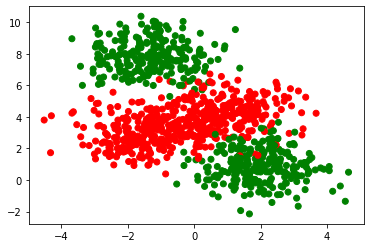

In [5]:
plt.scatter(data[:,0],data[:,1], c= labels, cmap=my_cmap)
plt.show()

## Train Test Split

In [6]:
X_train,X_val, Y_train, Y_val = train_test_split(data,labels,stratify=labels,random_state=0)
print(data.shape,X_train.shape,X_val.shape)
print(labels.shape,Y_train.shape,Y_val.shape)

(1000, 2) (750, 2) (250, 2)
(1000,) (750,) (250,)


## Model

![alt text](https://drive.google.com/uc?id=1O0TV0XYo39dwduAbqgxM635XC38aL0cJ)

In [7]:
class FirstFFNetwork:
  
  def __init__(self):
    np.random.seed(42)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):      
    if display_loss:
      loss = {}
      w1   = {}
      h3 = {}
      w5 = {}
      h1 = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        
  
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      
      if display_loss:
        w1[i] = self.w1
        h1[i] = self.h1
        w5[i] = self.w5
        h3[i] = self.h3

        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.tight_layout()

      plt.subplot(2,1,1)
      plt.plot(list(w1.values()))
      plt.xlabel('Epochs')
      plt.ylabel('W1')

      plt.subplot(2,1,2)
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

    return list(h1.values()),list(w5.values()),list(h3.values())
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


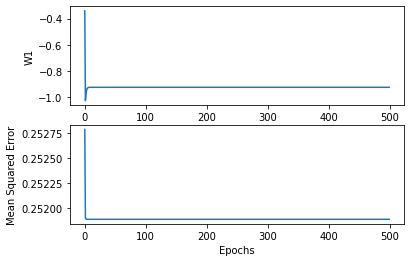

In [8]:
ffn = FirstFFNetwork()
h1, w5, h3 = ffn.fit(X_train,Y_train, epochs=500, learning_rate=1,display_loss=True)

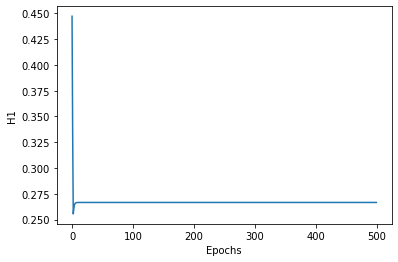

In [9]:
 plt.plot(h1)
 plt.xlabel('Epochs')
 plt.ylabel('H1')
 plt.show()

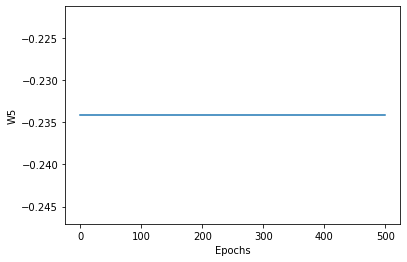

In [10]:
 plt.plot(w5)
 plt.xlabel('Epochs')
 plt.ylabel('W5')
 plt.show()

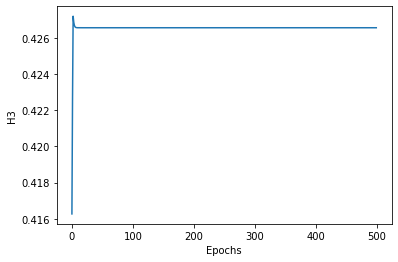

In [11]:
 plt.plot(h3)
 plt.xlabel('Epochs')
 plt.ylabel('H3')
 plt.show()